# PROJECT 2: Linear Regression (Figure 3.7)

##By: Sheikh Islam, Wilson Jimenez, and Talha Akhlaq

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Initial Prior Distribution Over The Weight (Row 1, Collumn 2)

In [ ]:
#Setting the Initial Parameters: These paramaters can be found in pg.154 of the book and the same ones Bishop used for his figure.
np.random.seed(21)
alpha = 2.0
S0 = (1 / alpha) * np.eye(2)
m0 = np.zeros(2)
a0 = -0.3 #Intercept
a1 = 0.5 #Slope

#Creating the Grid For The Heatmap
x, y = np.mgrid[-1:1:.01, -1:1:.01] #Setting up the axis for our heatmap: Using these same axis for all of the heatmaps as well.
pos = np.dstack((x, y)) #Stacking arrays together in order to feed into our pdf function to find the hot zones on the contour plot.
rv = multivariate_normal(m0, S0) #Calling the multivariate_normal function from scipy

fig = plt.figure(figsize=(15, 12)) #Creating the overall plot
ax12 = fig.add_subplot(432) #Subplot in our figure with 4 rows, 3 collumns, and Index 2 (that refers to row 1, collumn 2, index left to right)
ax12.set_aspect('equal') #Making it a sqaure
ax12.contourf(x, y, rv.pdf(pos), levels=100, cmap='turbo') #Taking each w0 and w1 combination and based on the pdf assigning it a color.
plt.close(fig) #Want to display my figure only in the end so closing it here.

Data Space Based on Initial Weight Distribution (Row 1, Collumn 3)

In [ ]:
# Pulling n random weights from distribution
n_samples = 6
ws = np.random.multivariate_normal(m0, S0, n_samples)

# Generating x values for plotting lines in our data space
x_vals = np.linspace(-1, 1, 100)
ax13 = fig.add_subplot(433) #Creating the next subplot with index 3 (refrences row 1, collumn 3)

# Creating figure by looping through our random weights and plotting the lines obtained from them (y=mx+b --> y=w1*x + w0)
for w in ws:
    y_vals = w[0] + w[1] * x_vals
    ax13.plot(x_vals, y_vals, color='red', linewidth=2)

# Plot formatting
ax13.set_xlim([-1, 1])
ax13.set_ylim([-1, 1])
ax13.set_aspect('equal')
ax13.set_xlabel("x")
ax13.set_ylabel("y");

Likelihood Based on One Data Point (Row 2, Collumn 1)

In [ ]:
#Adding Our Noise to the Data
beta = 25 #From the textbook

#Generating a random data point
x1 = np.random.uniform(-1, 1)
t1 = a0 + a1 * x1 + np.random.normal(0, 1 / np.sqrt(beta))

#Basis Vector for Simple Linear Models
basis1 = np.array([1, x1])

#Calculation our Predicted y and Liklihood
y_pred = pos[..., 0] * basis1[0] + pos[..., 1] * basis1[1]
likelihood = np.exp(-0.5 * beta * (t1 - y_pred)**2)

#Setting up Our Grid
ax31 = fig.add_subplot(434)
c = ax31.contourf(x, y, likelihood, levels=100, cmap='turbo')
ax31.plot(-0.3, 0.5, '+', color = 'white')
ax31.set_aspect('equal')
ax31.set_xlabel("w0")
ax31.set_ylabel("w1");

In [ ]:
# Row 2 / Collumn 2

# Computing the Covariance and Mean based on the Equations from Class
S0_inv = np.linalg.inv(S0)
SN_inv = S0_inv + beta * basis1 @ basis1.T
SN = np.linalg.inv(SN_inv)
mN = SN @ (S0_inv @ m0 + beta * t1 * basis1)

# Finding the Posterior Density since now we have the mean and the covariance, same as first time doing it just with updated values
posterior = multivariate_normal(mean=mN, cov=SN).pdf(pos)

# Plotting the posterior
ax22 = fig.add_subplot(435)
c = ax22.contourf(x, y, posterior, levels=100, cmap='turbo')
ax22.plot(-0.3, 0.5, marker = '+', color = 'white')
ax22.set_aspect('equal')
ax22.set_xlabel("w0")
ax22.set_ylabel("w1");

In [ ]:
#Row 2 / Collumn 3

# Sampling weights from the prior
ws = np.random.multivariate_normal(mN, SN, n_samples)

# Generating x values for plotting lines
x_vals = np.linspace(-1, 1, 100)
ax23 = fig.add_subplot(436)

# Creating figure
for w in ws:
    y_vals = w[0] + w[1] * x_vals
    ax23.plot(x_vals, y_vals, color='red', linewidth=2)

# Plot formatting
ax23.set_xlim([-1, 1])
ax23.set_ylim([-1, 1])
ax23.plot(x1, t1, 'bo', fillstyle='none')
ax23.set_aspect('equal')
ax23.set_xlabel("x")
ax23.set_ylabel("y");

In [ ]:
# Row 3 / Collumn 1

#Generating a random data point
x2 = np.random.uniform(-1, 1)
t2 = a0 + a1 * x1 + np.random.normal(0, 1 / np.sqrt(beta))

basis2 = np.array([1, x2])

#Calculation our Predicted y and Liklihood
y_pred = pos[..., 0] * basis2[0] + pos[..., 1] * basis2[1]
likelihood = np.exp(-0.5 * beta * (t2 - y_pred)**2)

#Setting up Our Grid
ax31 = fig.add_subplot(437)
c = ax31.contourf(x, y, likelihood, levels=100, cmap='turbo')
ax31.plot(-0.3, 0.5, '+', color = 'white')
ax31.set_aspect('equal')
ax31.set_xlabel("w0")
ax31.set_ylabel("w1");

In [ ]:
# Row 3 / Column 2

# Need a new basis vector
basis_vector = np.stack([basis1, basis2])
t_vec = np.array([t1, t2])

# Update posterior with both data points
S0_inv = np.linalg.inv(S0)
SN2_inv = S0_inv + beta * basis_vector.T @ basis_vector
SN2 = np.linalg.inv(SN2_inv)
mN2 = SN2 @ (S0_inv @ m0 + beta * basis_vector.T @ t_vec)

# Evaluate posterior density
posterior = multivariate_normal(mean=mN2, cov=SN2).pdf(pos)

# Plotting
ax32 = fig.add_subplot(438)
ax32.contourf(x, y, posterior, levels=100, cmap='turbo')
ax32.plot(-0.3, 0.5, marker='+', color='white')
ax32.set_aspect('equal')
ax32.set_xlabel("w0")
ax32.set_ylabel("w1");


In [ ]:
#Row 3 / Collumn 3

# Sampling weights from the prior
ws = np.random.multivariate_normal(mN2, SN2, n_samples)

# Generating x values for plotting lines
x_vals = np.linspace(-1, 1, 100)
ax33 = fig.add_subplot(439)

# Creating figure
for w in ws:
    y_vals = w[0] + w[1] * x_vals
    ax33.plot(x_vals, y_vals, color='red', linewidth=2)

# Plot formatting
ax33.set_xlim([-1, 1])
ax33.set_ylim([-1, 1])
ax33.plot(x1, t1, 'bo', fillstyle='none')
ax33.plot(x2, t2, 'bo', fillstyle='none')
ax33.set_aspect('equal')
ax33.set_xlabel("x")
ax33.set_ylabel("y");

In [ ]:
#Row 4 / Collumn 1

#Since we already worked with the first two examples start a list with them to easily manipulate in our loop.
xs = [x1, x2]
ts = [t1, t2]
basis_list = [basis1, basis2]

# Generate 18 more data points
for _ in range(18):
    xi = np.random.uniform(-1, 1)
    ti = a0 + a1 * xi + np.random.normal(0, 1 / np.sqrt(beta))
    xs.append(xi)
    ts.append(ti)
    basis_list.append(np.array([1, xi]))

x20 = xs[19]
t20 = ts[19]
basis20 = np.array([1, x20])

# Predicted y from this basis (same idea as earlier)
y_pred = pos[..., 0] * basis20[0] + pos[..., 1] * basis20[1]
likelihood = np.exp(-0.5 * beta * (t20 - y_pred)**2)

ax41 = fig.add_subplot(4, 3, 10)
ax41.contourf(x, y, likelihood, levels=100, cmap='turbo')
ax41.plot(-0.3, 0.5, marker='+', color='white')
ax41.set_aspect('equal')
ax41.set_xlabel("w0")
ax41.set_ylabel("w1");

In [ ]:
#Row 4 / Collumn 2

# Convert to arrays
basis_vector = np.stack(basis_list)
t_vec = np.array(ts)

# Update posterior with both data points
S0_inv = np.linalg.inv(S0)
SN20_inv = S0_inv + beta * basis_vector.T @ basis_vector
SN20 = np.linalg.inv(SN20_inv)
mN20 = SN20 @ (S0_inv @ m0 + beta * basis_vector.T @ t_vec)

posterior = multivariate_normal(mean=mN20, cov=SN20).pdf(pos)

ax42 = fig.add_subplot(4, 3, 11)  # 4th row, 2nd column
ax42.contourf(x, y, posterior, levels=100, cmap='turbo')
ax42.plot(-0.3, 0.5, marker='+', color='white')
ax42.set_aspect('equal')
ax42.set_xlabel("w0")
ax42.set_ylabel("w1");

In [ ]:
#Row 4 / Collumn 3

ws_final = np.random.multivariate_normal(mN20, SN20, n_samples)
x_vals = np.linspace(-1, 1, 100)
ax43 = fig.add_subplot(4, 3, 12)

for w in ws_final:
    y_vals = w[0] + w[1] * x_vals
    ax43.plot(x_vals, y_vals, color='red', linewidth=2)

# Plot the 20 data points
ax43.plot(xs, ts, 'bo', fillstyle='none')
ax43.set_xlim([-1, 1])
ax43.set_ylim([-1, 1])
ax43.set_aspect('equal')
ax43.set_xlabel("x")
ax43.set_ylabel("y");

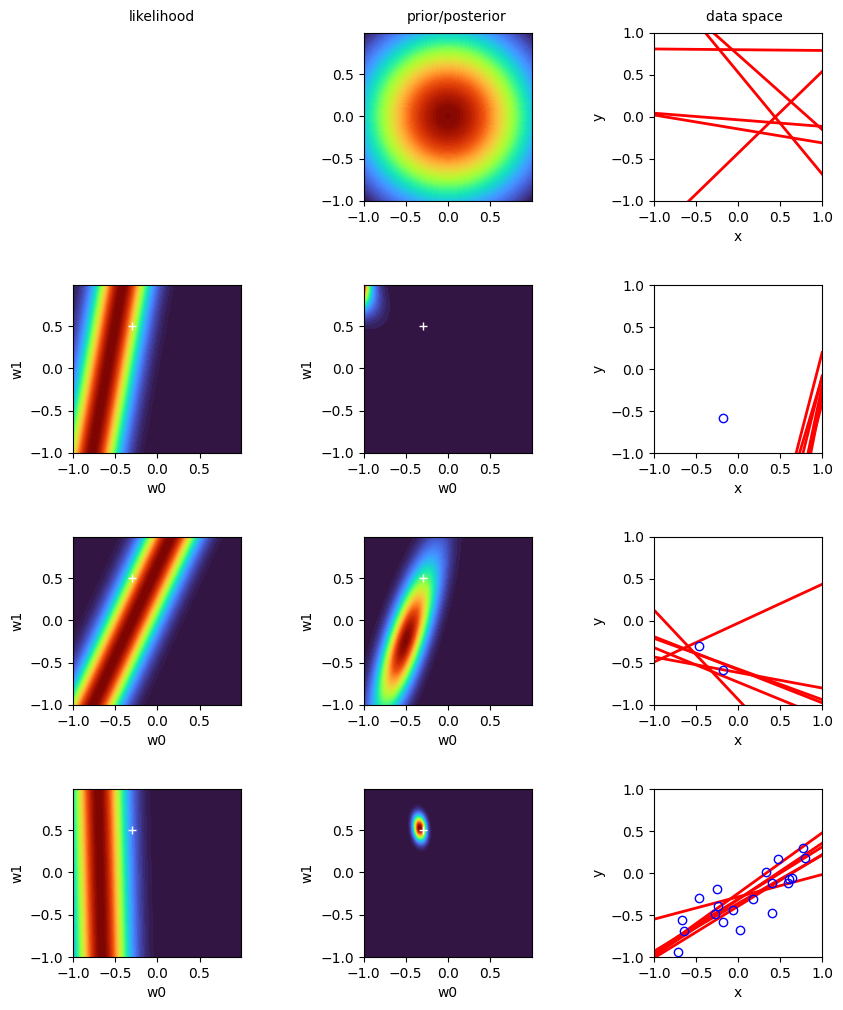

In [ ]:
#Displaying the entire figure as shown in the textbook
fig.text(0.300, 0.890, "likelihood", fontsize=10)
fig.text(0.485,  0.890, "prior/posterior", fontsize=10)
fig.text(0.685, 0.890, "data space", fontsize=10)
fig.subplots_adjust(hspace=0.5, wspace=-0.5)
display(fig)

# PROJECT 2: Linear Regression (Figure 3.8)

In [ ]:
#Setting Initial Parameters
alpha = 2.0 #didn't define what value so using same mean as figure 3.7
beta = 25 #didn't define what value so using same beta as figure 3.7
basis_funcs = 9

#Trying to improve how to shorten the code so going to generate 25 data points now and only plot first for N=1, first two for N=2, and etc.
x_samples = np.random.uniform(0, 1, 25)
t_samples = np.sin(2 * np.pi * x_samples) + np.random.normal(0, 1 / np.sqrt(beta), 25)

In [ ]:
#Setting the Overall Plot
fig = plt.figure(figsize=(12, 8)) #Creating the overall plot
ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(222)
ax21 = fig.add_subplot(223)
ax22 = fig.add_subplot(224)
plt.close(fig)

#Creating the original curve to plot on each figure for reference
x = np.linspace(0, 1, 500)
t_realcurve = np.sin(2 * np.pi * x)

#Setting up the same axis and curve onto all the plots
for ax in [ax11, ax12, ax21, ax22]:
    ax.set_xticks([0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$", rotation='horizontal')
    ax.yaxis.set_label_coords(-0.08, 0.65)
    ax.xaxis.set_label_coords(0.8, -.08)
    ax.plot(x, t_realcurve, color='#39FF14')

#Plotting the sample points into each respective graph
ax11.plot(x_samples[0], t_samples[0], 'bo', fillstyle='none')
ax12.plot(x_samples[:2], t_samples[:2], 'bo', fillstyle='none')
ax21.plot(x_samples[:4], t_samples[:4], 'bo', fillstyle='none')
ax22.plot(x_samples[:25], t_samples[:25], 'bo', fillstyle='none')

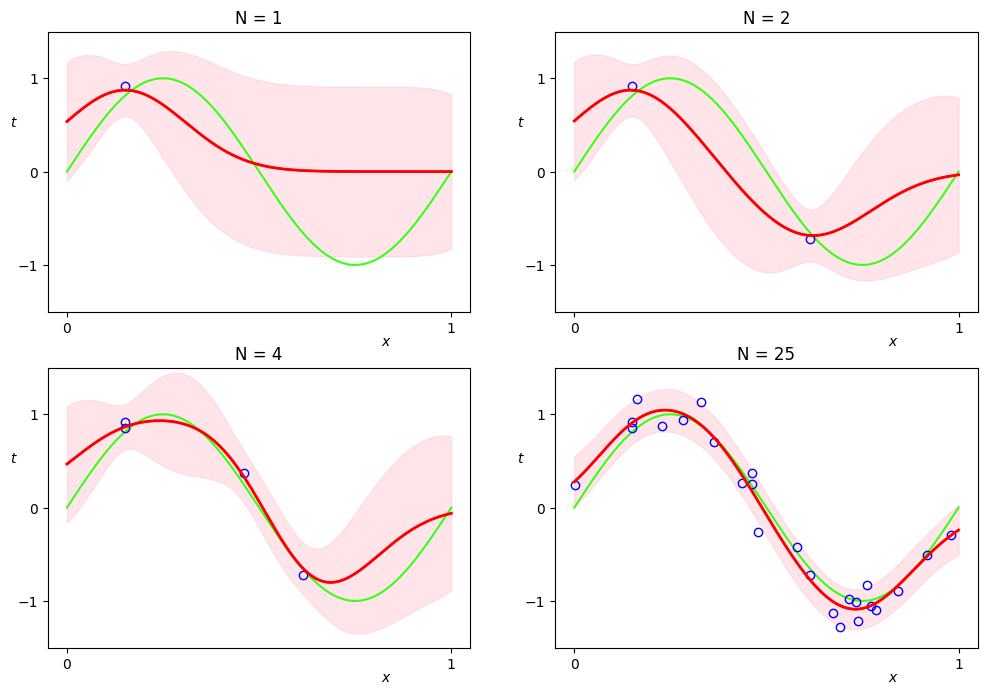

In [ ]:
#Creating our predictive curve for each of the observation counts
mu = np.linspace(0, 1, basis_funcs)

# List of subplots and training sizes
sample_count = [1, 2, 4, 25]

#this loop is to simplify the code by going through each sample size for each figure and then training from the data based on how many observations are taken.
#
for ax, N in zip([ax11, ax12, ax21, ax22], sample_count):
    x_train = x_samples[:N]
    t_train = t_samples[:N]

    #Setting up with the use of Gaussian Basis Function equation 3.4
    Phi = np.exp(-0.5 * ((x_train[:, None] - mu[None, :])**2) / (1 / basis_funcs)**2)
    Phi_pred = np.exp(-0.5 * ((x[:, None] - mu[None, :])**2) / (1 / basis_funcs)**2)

    # Posterior mean calculation
    S_N_inv = alpha * np.eye(basis_funcs) + beta * Phi.T @ Phi #equation 3.54
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N @ Phi.T @ t_train #equation 3.53

    # Predictive mean based on equation 3.58 where you can find the formula for the mean in the equation
    y_pred = Phi_pred @ m_N

    #For Shadded Region
    var_pred = 1 / beta + np.sum(Phi_pred @ S_N * Phi_pred, axis=1) #equation 3.59
    std_pred = np.sqrt(var_pred)

    ax.plot(x, y_pred, color='red', linewidth=2)
    ax.fill_between(x, y_pred - std_pred, y_pred + std_pred, color='pink', alpha=0.4)

    # Plot red predictive mean curve
    ax.plot(x, y_pred, color = 'red')

ax11.set_title("N = 1")
ax12.set_title("N = 2")
ax21.set_title("N = 4")
ax22.set_title("N = 25")

display(fig)

# Stretch Goal

alpha = 4.57199   beta = 36.3008


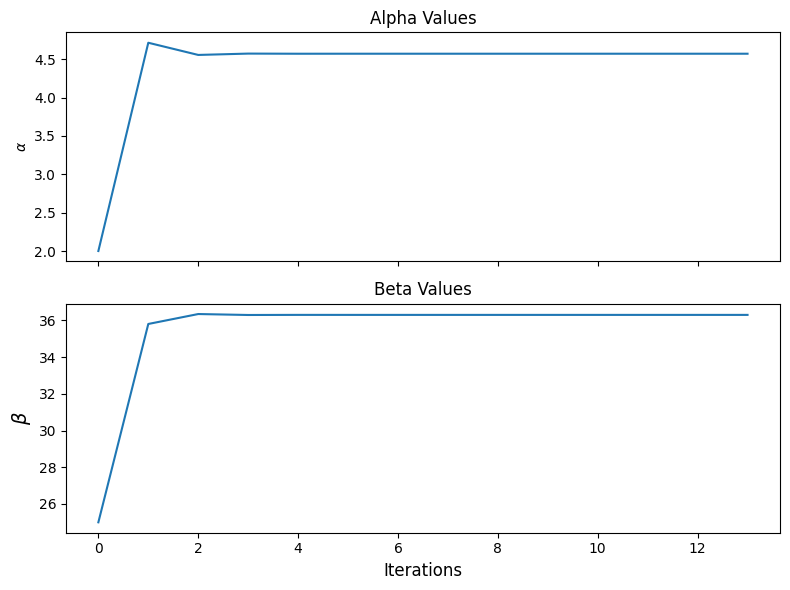

In [ ]:
#For euation 3.91 need eigenvalues and in the textbook says since Phi.T*Phi is fixed can compute at start and multiply by beta do get the desired value for the euqation
eigvals = np.linalg.eigvalsh(Phi.T @ Phi)

#To save values in order to determine convergence
alpha_values = []
beta_values = []

for it in range(1, 15):

    # Calculating posterior covariance and mean same as before in order equation 3.92
    S_N_inv = alpha * np.eye(basis_funcs) + beta * Phi.T @ Phi
    S_N     = np.linalg.inv(S_N_inv)
    m_N     = beta * S_N @ Phi.T @ t_samples

    # equation 3.91
    gamma = np.sum((beta * eigvals) / (alpha + beta * eigvals))

    # equation 3.92
    alpha_new = gamma / (m_N @ m_N)

    # equation 3.95
    bracket_part  = t_samples - Phi @ m_N
    beta_new  = (N - gamma) / (bracket_part @ bracket_part)

    alpha_values.append(alpha)
    beta_values.append(beta)

    # reassigning values to make it an iterative process
    alpha = alpha_new
    beta = beta_new

#Based on the graph we can tell the values converge so we will just print out the last value to approximate alpha and beta
print(f"alpha = {alpha:.6g}   beta = {beta:.6g}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plotting alpha
ax1.plot(alpha_values)
ax1.set_ylabel(r'$\alpha$')
ax1.set_title("Alpha Values")

# Plotting beta
ax2.plot(beta_values)
ax2.set_ylabel(r'$\beta$', fontsize=14)
ax2.set_xlabel('Iterations', fontsize=12)
ax2.set_title("Beta Values")

plt.tight_layout()
plt.show()

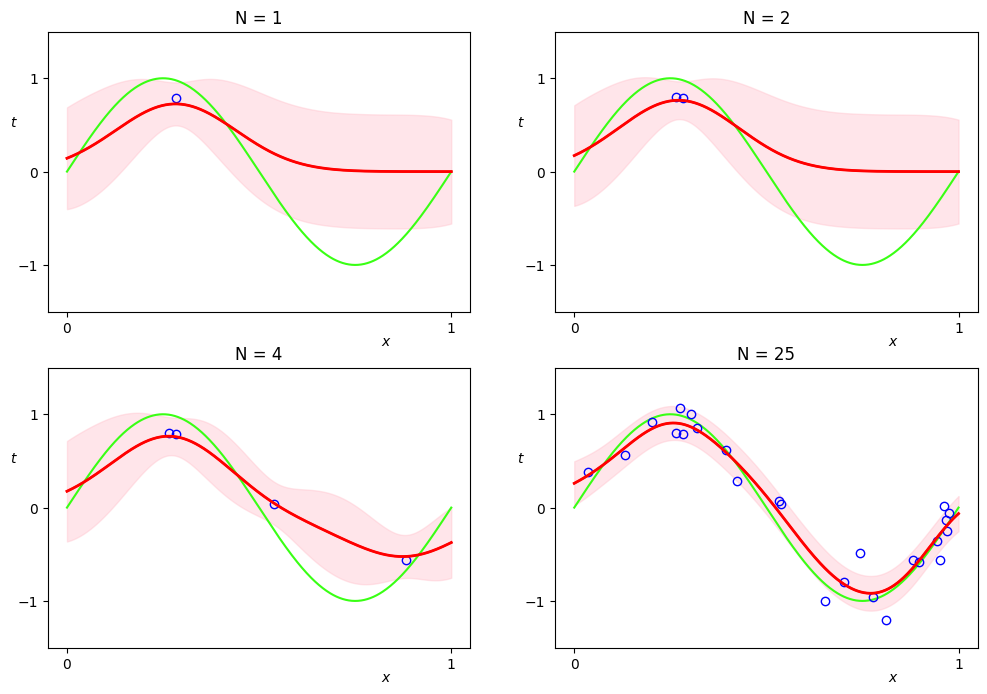

In [ ]:
#USING THE SAME CODE FROM FIGURE 3.8 JUST WITH OUR NEW ALPHA AND BETA VLAUES
#Setting Initial Parameters
alpha = 4.57199 #didn't define what value so using same mean as figure 3.7
beta = 36.3008 #didn't define what value so using same beta as figure 3.7
basis_funcs = 9

#Trying to improve how to shorten the code so going to generate 25 data points now and only plot first for N=1, first two for N=2, and etc.
x_samples = np.random.uniform(0, 1, 25)
t_samples = np.sin(2 * np.pi * x_samples) + np.random.normal(0, 1 / np.sqrt(beta), 25)

#Setting the Overall Plot
fig = plt.figure(figsize=(12, 8)) #Creating the overall plot
ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(222)
ax21 = fig.add_subplot(223)
ax22 = fig.add_subplot(224)
plt.close(fig)

#Creating the original curve to plot on each figure for reference
x = np.linspace(0, 1, 500)
t_realcurve = np.sin(2 * np.pi * x)

#Setting up the same axis and curve onto all the plots
for ax in [ax11, ax12, ax21, ax22]:
    ax.set_xticks([0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$t$", rotation='horizontal')
    ax.yaxis.set_label_coords(-0.08, 0.65)
    ax.xaxis.set_label_coords(0.8, -.08)
    ax.plot(x, t_realcurve, color='#39FF14')

#Plotting the sample points into each respective graph
ax11.plot(x_samples[0], t_samples[0], 'bo', fillstyle='none')
ax12.plot(x_samples[:2], t_samples[:2], 'bo', fillstyle='none')
ax21.plot(x_samples[:4], t_samples[:4], 'bo', fillstyle='none')
ax22.plot(x_samples[:25], t_samples[:25], 'bo', fillstyle='none')

#Creating our predictive curve for each of the observation counts
mu = np.linspace(0, 1, basis_funcs)

# List of subplots and training sizes
sample_count = [1, 2, 4, 25]

#this loop is to simplify the code by going through each sample size for each figure and then training from the data based on how many observations are taken.
#
for ax, N in zip([ax11, ax12, ax21, ax22], sample_count):
    x_train = x_samples[:N]
    t_train = t_samples[:N]

    #Setting up with the use of Gaussian Basis Function equation 3.4
    Phi = np.exp(-0.5 * ((x_train[:, None] - mu[None, :])**2) / (1 / basis_funcs)**2)
    Phi_pred = np.exp(-0.5 * ((x[:, None] - mu[None, :])**2) / (1 / basis_funcs)**2)

    # Posterior mean calculation
    S_N_inv = alpha * np.eye(basis_funcs) + beta * Phi.T @ Phi #equation 3.54
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N @ Phi.T @ t_train #equation 3.53

    # Predictive mean based on equation 3.58 where you can find the formula for the mean in the equation
    y_pred = Phi_pred @ m_N

    #For Shadded Region
    var_pred = 1 / beta + np.sum(Phi_pred @ S_N * Phi_pred, axis=1) #equation 3.59
    std_pred = np.sqrt(var_pred)

    ax.plot(x, y_pred, color='red', linewidth=2)
    ax.fill_between(x, y_pred - std_pred, y_pred + std_pred, color='pink', alpha=0.4)

    # Plot red predictive mean curve
    ax.plot(x, y_pred, color = 'red')

ax11.set_title("N = 1")
ax12.set_title("N = 2")
ax21.set_title("N = 4")
ax22.set_title("N = 25")

display(fig)